# Author_Identification

In [61]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
train_df=pd.read_csv('S:\\train.csv')
train_df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [63]:
test_df=pd.read_csv('S:\\test.csv')
test_df.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


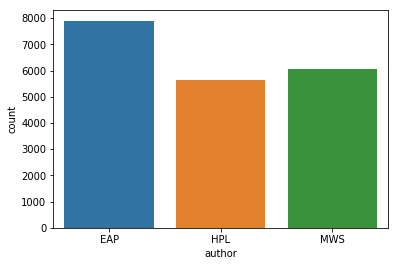

In [64]:
sns.countplot('author',data=train_df)

# Feature Engineering

In [65]:
grouped_df = train_df.groupby('author')
for name, group in grouped_df:
    print("Author name : ", name)
    cnt = 0
    for ind, row in group.iterrows():
        print(row["text"])
        cnt += 1
        if cnt == 5:
            break
    print("\n")

Author name :  EAP
This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.
In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.
The astronomer, perhaps, at this point, took refuge in the suggestion of non luminosity; and here analogy was suddenly let fall.
The surcingle hung in ribands from my body.
I knew that you could not say to yourself 'stereotomy' without being brought to think of atomies, and thus of the theories of Epicurus; and since, when we discussed this subject not very long ago, I mentioned to you how singularly, yet with how little notice, the vague guesses of that noble Greek had met with confirmation in the late nebular cosmogony, I felt that you coul

# Word Cloud Visualization:

This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.
EAP


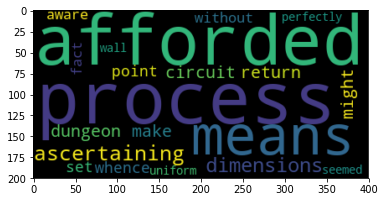

In [66]:
!pip install wordcloud
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
X = train_df['text']
wordcloud1 = WordCloud().generate(X[0]) # for EAP
print(X[0])
print(train_df['author'][0])
plt.imshow(wordcloud1, interpolation='bilinear')
plt.show()

It never once occurred to me that the fumbling might be a mere mistake.
HPL


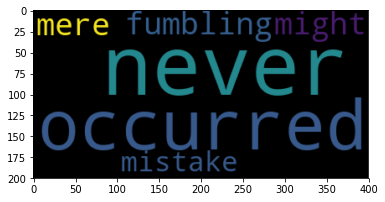

In [67]:
wordcloud2 = WordCloud().generate(X[1]) # for HPL
print(X[1])
print(train_df['author'][1])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()

How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.
MWS


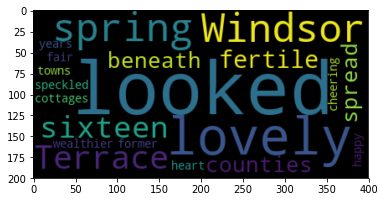

In [68]:
wordcloud3 = WordCloud().generate(X[3]) # for MWS 
print(X[3])
print(train_df['author'][3])
plt.imshow(wordcloud3, interpolation='bilinear')
plt.show()

# Text Preprocessing

In [69]:
# Importing necessary libraries
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()

In [70]:
def text_process(text):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in text if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not in stopwords.words('english')]


# Meta Features:

In [71]:
train_df['word_cnt']=train_df['text'].apply(lambda x:len(str(x).split()))
test_df['word_cnt']=test_df['text'].apply(lambda x:len(str(x).split()))

train_df['unique_words']=train_df['text'].apply(lambda x:len(set(str(x).split())))
test_df['unique_words']=test_df['text'].apply(lambda x:len(set(str(x).split())))

train_df['Char_cnt']=train_df['text'].apply(lambda x: len(str(x)))
test_df['Char_cnt']=test_df['text'].apply(lambda x: len(str(x)))   

train_df["num_words_title"] = train_df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
test_df["num_words_title"] = test_df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

train_df["mean_word_len"] = train_df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test_df["mean_word_len"] = test_df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [72]:
train_df.head()

,id,text,author,word_cnt,unique_words,Char_cnt,num_words_title,mean_word_len
0,id26305,"This process, however, afforded me no means of...",EAP,41,35,231,3,4.658537
1,id17569,It never once occurred to me that the fumbling...,HPL,14,14,71,1,4.142857
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,36,32,200,1,4.583333
3,id27763,How lovely is spring As we looked from Windsor...,MWS,34,32,206,4,5.088235
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,27,25,174,2,5.481481


# Label Encoding

In [73]:
author_mapping_dict = {'EAP':0, 'HPL':1, 'MWS':2}
train_y = train_df['author'].map(author_mapping_dict)

In [74]:
train_X=train_df.drop(['author','id','text'],axis=1)
test_X=test_df.drop(['id','text'],axis=1)

# Training the model

In [75]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(Train_X, train_y)  

KNeighborsClassifier()

In [76]:
classifier.score(Train_X,train_y)

0.5697941672199806

# Text Based Features

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
full_tfidf = tfidf.fit_transform(train_df['text'].values.tolist() + test_df['text'].values.tolist())
train_tfidf = tfidf.transform(train_df['text'].values.tolist())
test_tfidf = tfidf.transform(test_df['text'].values.tolist())

In [78]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model = model.fit(train_tfidf,train_y)

In [79]:
model.score(train_tfidf,train_y)

0.9898360488278257

In [82]:
predictions=model.predict_proba(test_tfidf)
predictions.shape

(8392, 3)

In [83]:
result=pd.DataFrame()
result["id"]=test_df["id"]
result["EAP"]=predictions[:,0]
result["HPL"]=predictions[:,1]
result["MWS"]=predictions[:,2]
result.head()

,id,EAP,HPL,MWS
0,id02310,0.399525,0.185291,0.415183
1,id24541,0.557804,0.219346,0.222850
2,id00134,0.457355,0.336841,0.205803
3,id27757,0.524922,0.306300,0.168778
4,id04081,0.569437,0.223275,0.207288


In [84]:
y_pred=model.predict(test_tfidf)
y_pred

array([2, 0, 0, ..., 0, 2, 0], dtype=int64)